In [152]:
library(ggplot2)

In [153]:
LM = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/sce_lamanno_embryo.Rds")

In [154]:
LM

class: SingleCellExperiment 
dim: 19531 1977 
metadata(0):
assays(1): counts
rownames(19531): DDX11L1 WASH7P_p1 ... VAMP7_loc1 DDX11L16_loc1
rowData names(0):
colnames(1977): 1772067_089_A01 1772067_089_A02 ... 1772122_224_H10
  1772122_224_H12
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [155]:
LM <- scater::logNormCounts(LM, log=T)
LM

class: SingleCellExperiment 
dim: 19531 1977 
metadata(0):
assays(2): counts logcounts
rownames(19531): DDX11L1 WASH7P_p1 ... VAMP7_loc1 DDX11L16_loc1
rowData names(0):
colnames(1977): 1772067_089_A01 1772067_089_A02 ... 1772122_224_H10
  1772122_224_H12
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [97]:
lamanno_dir = "/nfs/leia/research/stegle/dseaton/data/scrnaseq_datasets/lemanno2016_mouse_human_DAneuron/"
filename1 = paste0(lamanno_dir, 'lemanno2016_human_embryo_brain_markers.tsv')
df1 = read.csv(filename1, sep = "\t")
df1$celltype_id = as.character(df1$celltype_id)
DA_genes = as.character(df1[df1$celltype_id %in% c('hDA0','hDA1','hDA2'),'marker_gene'])
head(DA_genes)

[1] "ACOT7"  "ACSL4"  "ACSL5"  "ACTL6B" "ACVR1B" "ADARB2"

In [104]:
pca = prcomp(t(logcounts(LM)))
# pca = prcomp(t(logcounts(LM)[rownames(LM) %in% DA_genes,]))

In [105]:
df = as.data.frame(cbind(pca$x[,1:2], colData(LM)[,c("Cell_type","Timepoint")]))
head(df,2)

,PC1,PC2,Cell_type,Timepoint
1772067_089_A01,-10.144506,-5.451654,hMgl,week_7
1772067_089_A02,-8.846618,-2.946508,hRgl2a,week_7


In [106]:
nrow(df)
nrow(df[df$Cell_type == "hSert",])
nrow(df[df$Cell_type == "hDA0",])
nrow(df[df$Cell_type == "hDA1",])
nrow(df[df$Cell_type == "hDA2",])

[1] 1977

[1] 14

[1] 47

[1] 38

[1] 37

In [110]:
nrow(df[df$Timepoint == 'week_6',])
nrow(df[df$Timepoint == 'week_7',])
nrow(df[df$Timepoint == 'week_8',])
nrow(df[df$Timepoint == 'week_9',])
nrow(df[df$Timepoint == 'week_10',])
nrow(df[df$Timepoint == 'week_11',])

[1] 287

[1] 131

[1] 331

[1] 322

[1] 509

[1] 397

In [111]:
options(repr.plot.width = 8, repr.plot.height = 6)

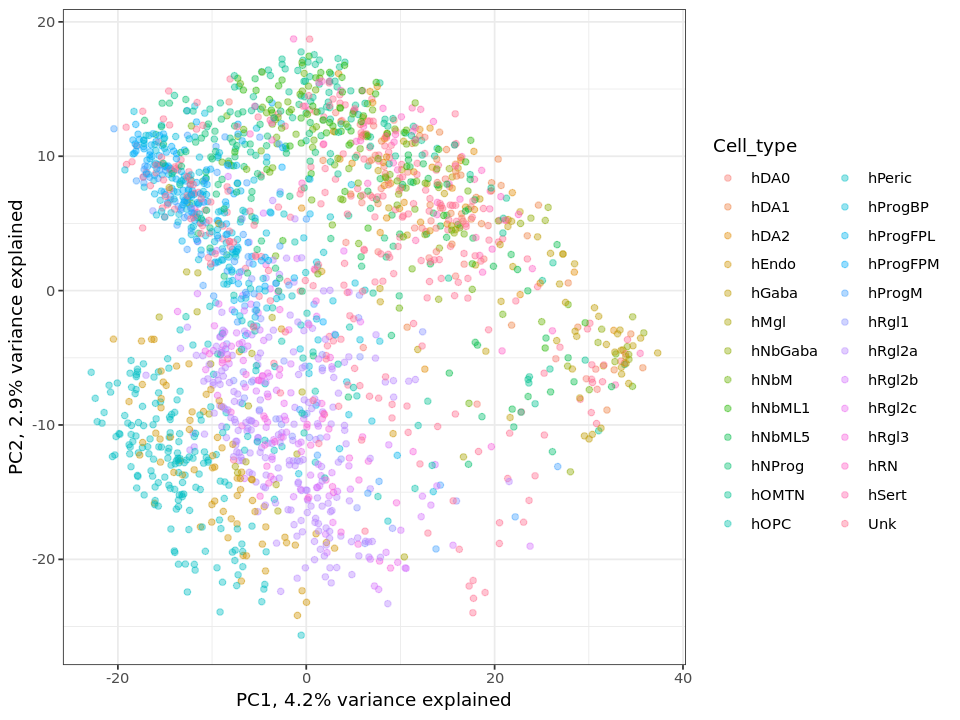

In [112]:
perc_var <- round(summary(pca)$importance[2,]*100, 1)
ggplot(df, aes(x = PC1, y = PC2, colour = Cell_type)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
#         geom_point(aes(x = PC1, y = PC2), data = df[grep("Sert",df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        theme_bw() + #theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))

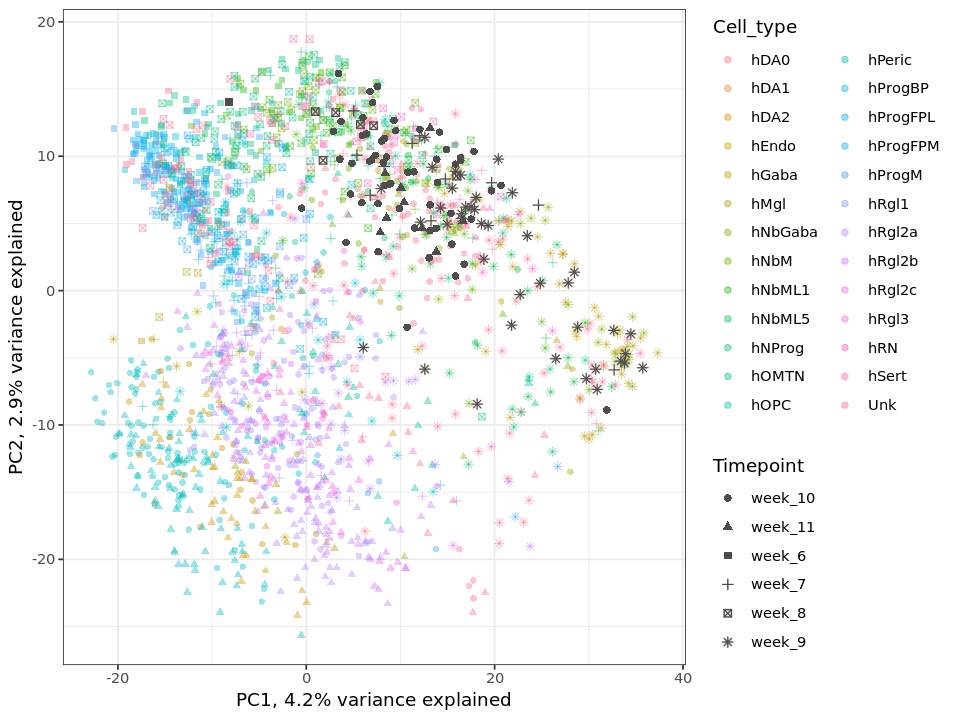

In [113]:
perc_var <- round(summary(pca)$importance[2,]*100, 1)
ggplot(df, aes(x = PC1, y = PC2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
        geom_point(aes(x = PC1, y = PC2), data = df[grep("DA",df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        theme_bw() + #theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))

In [28]:
pca_df = df

In [116]:
set.seed(147)
library(Rtsne)
tsne <- Rtsne(t(logcounts(LM)), pca = TRUE)
head(tsne$Y)

-9.872122,19.778281
-14.820821,-13.687915
25.636042,-6.620821
-13.404245,-13.794005
-13.836927,-12.148834
-28.006803,6.953765


In [147]:
tsne_df = as.data.frame(cbind(tsne$Y, colData(LM)[,c("Cell_type","Timepoint","Cell_ID")]))
colnames(tsne_df)[1:2] = paste0("tsne",1:2)
rownames(tsne_df) = tsne_df$Cell_ID
head(tsne_df,2)

,tsne1,tsne2,Cell_type,Timepoint,Cell_ID
1772067_089_A01,-9.872122,19.77828,hMgl,week_7,1772067_089_A01
1772067_089_A02,-14.820821,-13.68791,hRgl2a,week_7,1772067_089_A02


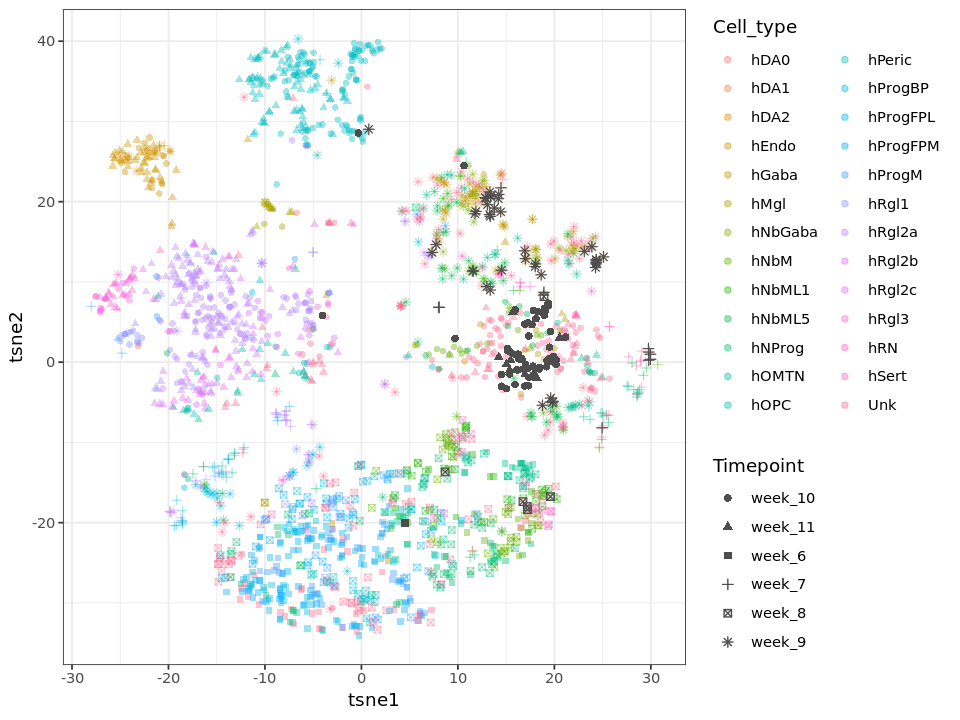

In [122]:
ggplot(tsne_df, aes(x = tsne1, y = tsne2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
        geom_point(aes(x = tsne1, y = tsne2), data = tsne_df[grep("DA",tsne_df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        theme_bw() 
# + #theme(legend.position = "none", panel.border = element_blank()) + 

In [163]:
# install.packages("umap")
# library(umap)
embedding = umap(t(logcounts(LM)))

In [165]:
?umap

In [167]:
# str(embedding)
head(embedding$layout,2)

1772067_089_A01,-0.8418879,-3.8986882
1772067_089_A02,-1.7928551,0.4463275


In [168]:
umap_df = as.data.frame(cbind(embedding$layout, colData(LM)[,c("Cell_type","Timepoint","Cell_ID")]))
colnames(umap_df)[1:2] = paste0("umap",1:2)
rownames(umap_df) = umap_df$Cell_ID
head(umap_df,2)

,umap1,umap2,Cell_type,Timepoint,Cell_ID
1772067_089_A01,-0.8418879,-3.8986882,hMgl,week_7,1772067_089_A01
1772067_089_A02,-1.7928551,0.4463275,hRgl2a,week_7,1772067_089_A02


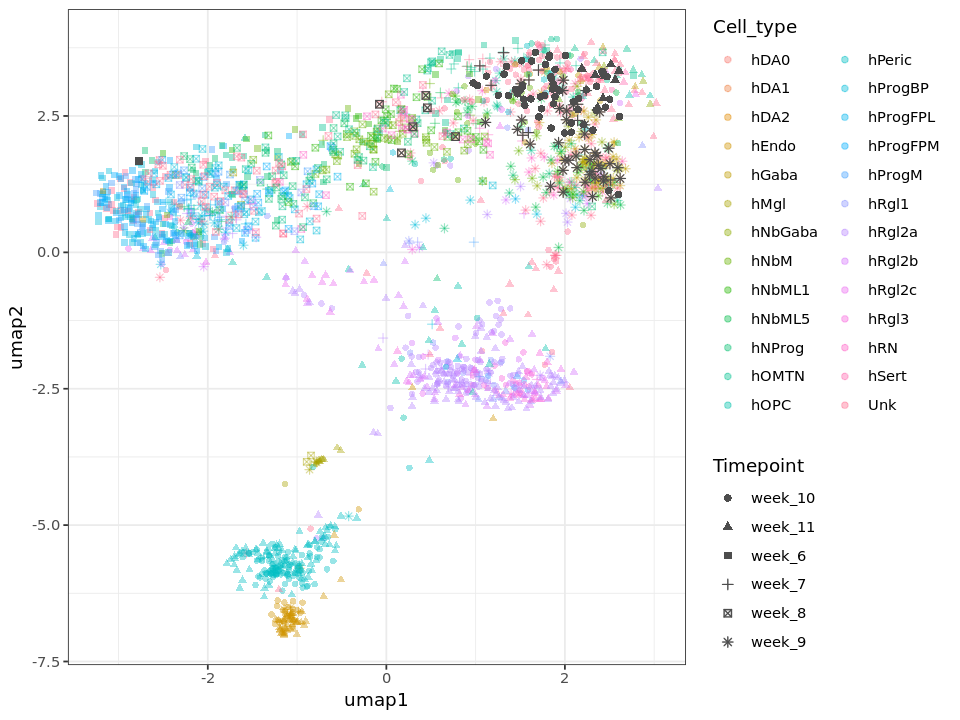

In [169]:
ggplot(umap_df, aes(x = umap1, y = umap2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
        geom_point(aes(x = umap1, y = umap2), data = umap_df[grep("DA",umap_df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        theme_bw() 
# + #theme(legend.position = "none", panel.border = element_blank()) + 

In [30]:
LM$Cell_type = as.character(LM$Cell_type)
unique(LM$Cell_type)

[1] "hMgl"     "hRgl2a"   "Unk"      "hNProg"   "hProgBP"  "hProgM"  
 [7] "hOMTN"    "hDA0"     "hNbM"     "hProgFPL" "hEndo"    "hProgFPM"
[13] "hRgl2b"   "hNbML5"   "hRgl3"    "hRN"      "hPeric"   "hDA1"    
[19] "hRgl1"    "hGaba"    "hDA2"     "hSert"    "hNbGaba"  "hNbML1"  
[25] "hRgl2c"   "hOPC"

In [178]:
LM = LM[,LM$Cell_type %in% c('hDA0','hDA1','hDA2','hSert')]

In [32]:
LM <- scater::logNormCounts(LM, log=T)
alt.fit2 <- scran::trendVar(LM, use.spikes = FALSE)
alt.decomp2 <- scran::decomposeVar(LM, alt.fit2)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [33]:
genes_LM = rownames(alt.decomp2[order(alt.decomp2$bio, decreasing = TRUE),][1:2000,])

In [34]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/"

In [35]:
neuroseq_filename = paste0(mydir,"neuroseq_all_25pct_sce.Rds")
neuroseq = readRDS(neuroseq_filename)

In [36]:
neuroseq = neuroseq[,neuroseq$celltype %in% c('DA','Sert','CHem')]

In [37]:
neuroseq <- scater::logNormCounts(neuroseq, log=T)
design <- model.matrix(~pool_id, data = colData(neuroseq))
alt.fit <- scran::trendVar(neuroseq, design = design, use.spikes = FALSE)
alt.decomp <- scran::decomposeVar(neuroseq, alt.fit)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [38]:
genes_neuroseq = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:2000,])

In [39]:
all_genes = unique(c(genes_LM,genes_neuroseq))

In [40]:
genes_n = rownames(neuroseq)[rownames(neuroseq) %in% all_genes]
common_genes = rownames(LM)[rownames(LM) %in% genes_n]

In [185]:
length(common_genes)

[1] 3260

In [41]:
query = neuroseq[common_genes,]
reference = LM[common_genes,]

In [42]:
query$batch_factor = "query"
reference$batch_factor = "reference"

In [43]:
getJointPCA = function(reference, query, 
                       assayNameRef = "logcounts",
                       assayNameQuery = "logcounts") {
# reference and query are SingleCellExperiment objects
  all_assay = cbind(assay(query, assayNameQuery),
                    assay(reference, assayNameRef))
# batch factors can be dataset specific batches or just a factor labelling i.e. "query", "reference" 
#   batchFactor = factor(c(as.character(query$sample_id),
#                            as.character(reference$dataset)))
 batchFactor = factor(c(as.character(query$batch_factor),
                           as.character(reference$batch_factor)))
#   print(table(batchFactor))
  mbpca = batchelor::multiBatchPCA(all_assay,
                        batch = batchFactor,
                        d = 50
                        # BPPARAM = BiocParallel::MulticoreParam(workers = 4)
  )
  print("done multibatch PCA")
  dim(mbpca[[1]])
  out = do.call(batchelor::reducedMNN, mbpca)
  print("done batch correction")
  joint_mnn_pca = out$corrected
  return(joint_mnn_pca)
}

In [44]:
joint_mnn_pca = getJointPCA(reference, query)

Warning message in sweep(centered, 2, w, "/", check.margin = FALSE):
“'check.margin' is ignored when 'x' is a DelayedArray object or
  derivative”

[1] "done multibatch PCA"
[1] "done batch correction"


In [45]:
df_pca = as.data.frame(joint_mnn_pca[,c(1:2)])
colnames(df_pca) = paste0("PC",1:2)
head(df_pca)

,PC1,PC2
TAGAGCTAGCGTAATA-1-6,-14.919414,1.7130479
CATGACAGTGTGCCTG-1-6,-8.397323,-10.3357769
ACAGCCGGTATATCCG-1-6,-11.423239,0.3737249
GGGCACTCAAAGCGGT-1-6,-15.702511,3.3914213
GATGCTATCCTTCAAT-1-6,-4.564014,-16.7410936
TTGGCAATCAGCATGT-1-6,-12.620668,-3.5914597


In [46]:
mat = matrix(0, nrow = length(unique(query$celltype)), ncol = length(unique(reference$Cell_type)))
nrow(mat)
ncol(mat)

[1] 3

[1] 4

In [47]:
rownames(mat) = unique(query$celltype)
colnames(mat) = unique(reference$Cell_type)

In [48]:
i = 0
for (celltype in unique(query$celltype)){
#     print(celltype)
    j = 0
    i = i+1
    sel_cells = colnames(query[,query$celltype == celltype])
    closest_atlas_cell_ind = BiocNeighbors::queryKNN(
        joint_mnn_pca[colnames(reference),],
        joint_mnn_pca[sel_cells,],
        k = 1, get.index = TRUE, get.distance = FALSE)
    mapped_cells = colnames(reference)[closest_atlas_cell_ind$index]
    for (cluster in unique(reference$Cell_type)){
#         print(cluster)
        j = j+1
        n = length(mapped_cells[mapped_cells %in% colnames(reference[,reference$Cell_type == cluster])])
        mat[i,j] = n/length(mapped_cells)
#         print(mat[i,j])
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [128]:
mat

,hDA0,hDA1,hDA2,hSert
Sert,0.95564844,0.01837577,0.02453721,0.001438576
DA,0.09563437,0.39253716,0.35646455,0.155363914
CHem,0.15693707,0.18413571,0.36173237,0.297194845


In [129]:
library(reshape2)
mat_melt = melt(mat)
head(mat_melt)

Var1,Var2,value
Sert,hDA0,0.95564844
DA,hDA0,0.09563437
CHem,hDA0,0.15693707
Sert,hDA1,0.01837577
DA,hDA1,0.39253716
CHem,hDA1,0.18413571


In [130]:
library(ggplot2)

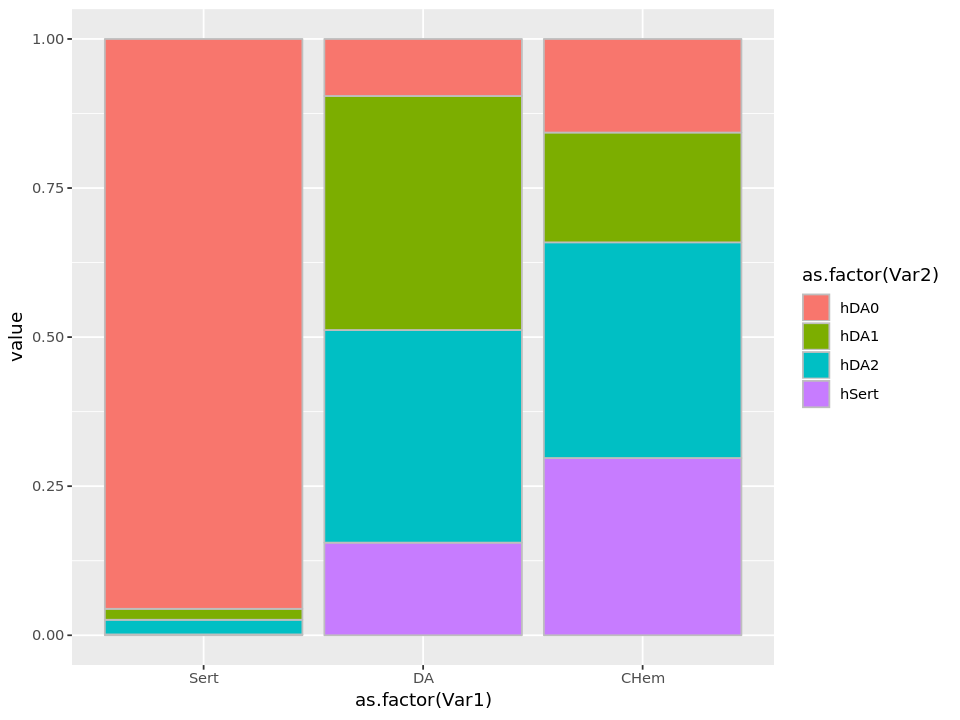

In [131]:
df = as.data.frame(mat_melt)
ggplot(df, aes(x = as.factor(Var1), y = value, fill = as.factor(Var2))) + geom_bar(stat="identity", col = "grey")

In [198]:
# sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA' & neuroseq$time_point == 'D30' & 
#                              neuroseq$treatment == 'NONE'])
sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA'])

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [199]:
closest_atlas_cell_ind = BiocNeighbors::queryKNN(
    joint_mnn_pca[colnames(LM),],
    joint_mnn_pca[sel_cells,],
  k = 1, get.index = TRUE, get.distance = FALSE)

In [200]:
mapped_cells = colnames(LM)[closest_atlas_cell_ind$index]
head(mapped_cells)

[1] "1772121_283_D02" "1772122_318_D10" "1772121_283_D02" "1772121_282_C07"
[5] "1772121_283_C09" "1772121_283_C09"

In [201]:
mapped_df = pca_df[mapped_cells,]
head(mapped_df)
nrow(mapped_df)
# nrow(mapped_df[mapped_df$Timepoint == 'week_6',])
# nrow(mapped_df[mapped_df$Timepoint == 'week_7',])
# nrow(mapped_df[mapped_df$Timepoint == 'week_8',])
# nrow(mapped_df[mapped_df$Timepoint == 'week_9',])
# nrow(mapped_df[mapped_df$Timepoint == 'week_10',])
# nrow(mapped_df[mapped_df$Timepoint == 'week_11',])
nrow(mapped_df[mapped_df$Cell_type == 'hDA0',])
nrow(mapped_df[mapped_df$Cell_type == 'hDA1',])
nrow(mapped_df[mapped_df$Cell_type == 'hDA2',])
nrow(mapped_df[mapped_df$Cell_type == 'hSert',])

,PC1,PC2,Cell_type,Timepoint
1772121_283_D02,6.771069,14.82288,hDA2,week_10
1772122_318_D10,-8.188038,14.04495,hDA0,week_6
1772121_283_D02.1,6.771069,14.82288,hDA2,week_10
1772121_282_C07,14.157457,11.79297,hDA1,week_10
1772121_283_C09,3.431868,16.14864,hDA2,week_10
1772121_283_C09.1,3.431868,16.14864,hDA2,week_10


[1] 29801

[1] 2850

[1] 11698

[1] 10623

[1] 4630

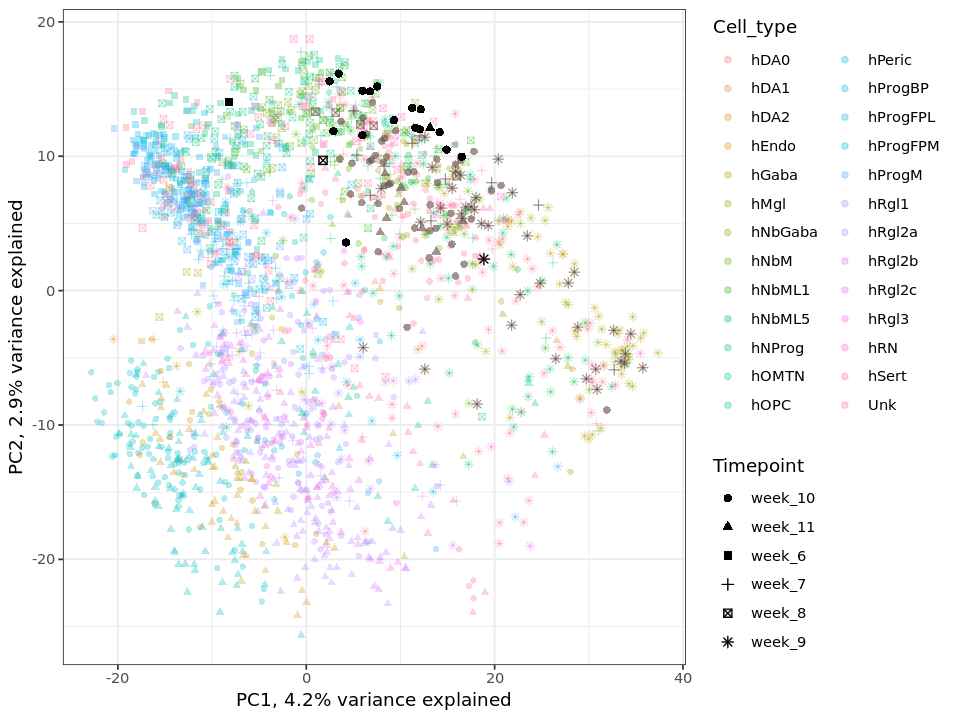

In [182]:
ggplot(pca_df, aes(x = PC1, y = PC2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.3, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
        geom_point(aes(x = PC1, y = PC2), data = pca_df[grep("DA",pca_df$Cell_type),], col = "gray30", alpha = 0.5, size = 1.8) +
        geom_point(aes(x = PC1, y = PC2), data = pca_df[mapped_cells,], col = "black", alpha = 1, size = 2) +
        theme_bw() + #theme(legend.position = "none", panel.border = element_blank()) + 
        xlab(paste0("PC1, ",perc_var[1],"% variance explained")) +
        ylab(paste0("PC2, ",perc_var[2],"% variance explained"))

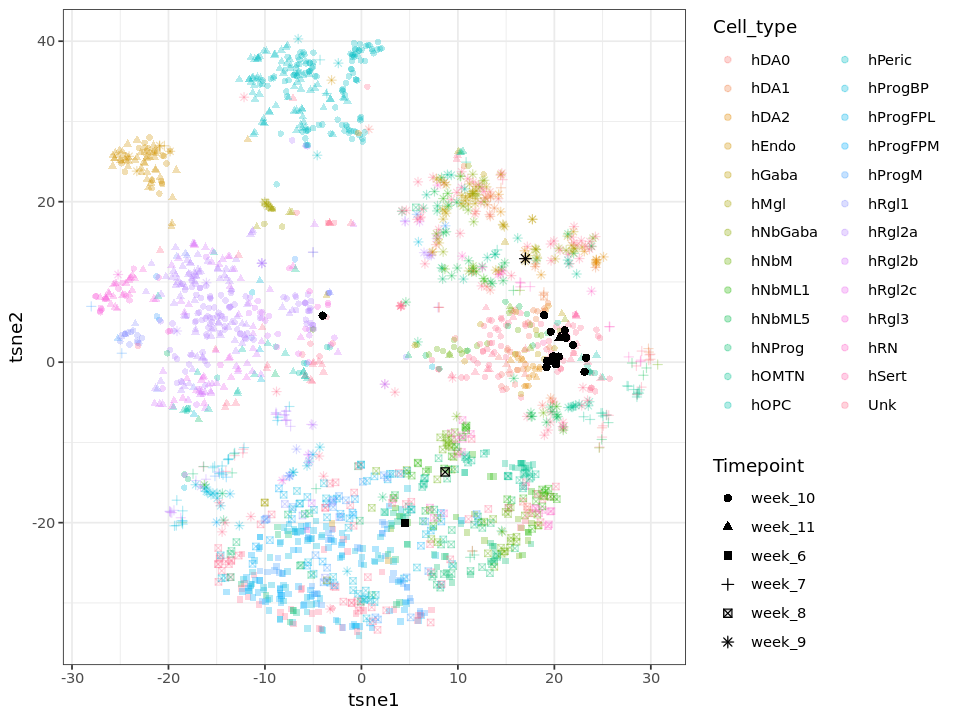

In [183]:
ggplot(tsne_df, aes(x = tsne1, y = tsne2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.3, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
#         geom_point(aes(x = tsne1, y = tsne2), data = tsne_df[grep("DA",tsne_df$Cell_type),], col = "gray30", alpha = 0.5, size = 1.8) +
        geom_point(aes(x = tsne1, y = tsne2), data = tsne_df[mapped_cells,], col = "black", alpha = 1, size = 2) +
        theme_bw() 

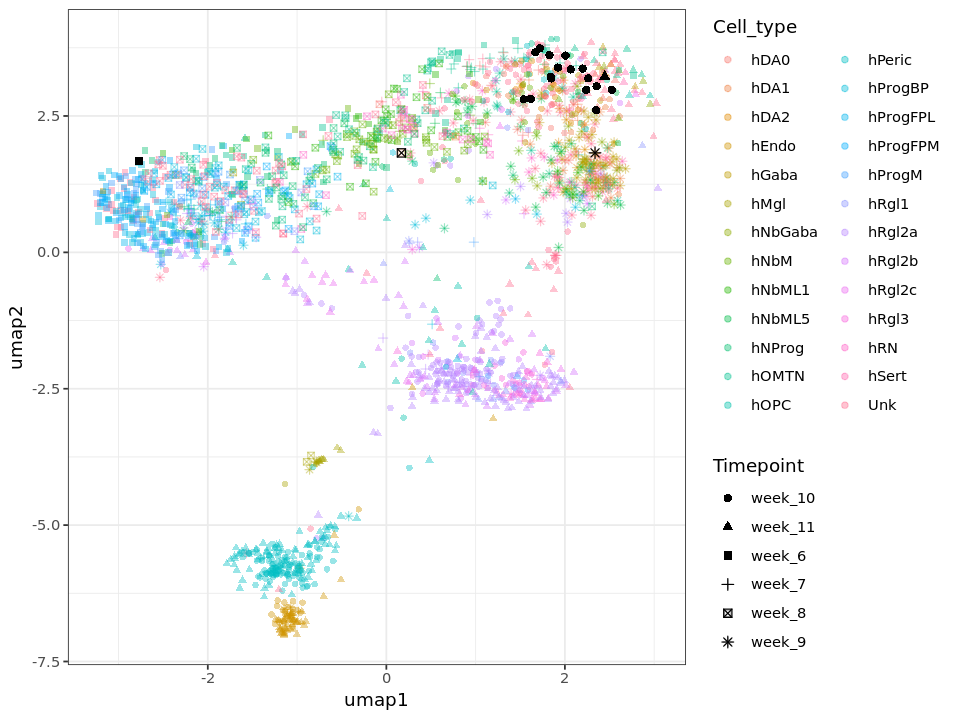

In [184]:
ggplot(umap_df, aes(x = umap1, y = umap2, colour = Cell_type, shape = Timepoint)) + 
        geom_point(alpha = 0.4, size = 1.5) + 
#         scale_color_canva(palette = "Pool party") +
#         geom_point(aes(x = umap1, y = umap2), data = umap_df[grep("DA",umap_df$Cell_type),], col = "gray30", alpha = 1, size = 1.8) +
        geom_point(aes(x = umap1, y = umap2), data = umap_df[mapped_cells,], col = "black", alpha = 1, size = 2) +
        theme_bw() 
# + #theme(legend.position = "none", panel.border = element_blank()) + 

In [70]:
df = as.data.frame(colData(LM))
head(df,2)

,Cell_ID,Cell_type,Timepoint
1772067_089_B06,1772067_089_B06,hDA0,week_7
1772071_027_C04,1772071_027_C04,hDA1,week_7


In [71]:
lm_clusters = as.character(unique(LM$Cell_type))

In [72]:
for (cluster in lm_clusters){
    n = length(mapped_cells[mapped_cells %in% rownames(df[df$Cell_type == cluster,])])
    if (n/length(mapped_cells) > 0.01){
        print(c(cluster, n, n/length(mapped_cells)))
    }
}

[1] "hDA0"               "687"                "0.0627569197040285"
[1] "hDA1"             "6517"             "0.59532291952133"
[1] "hDA2"              "1812"              "0.165524801315429"
[1] "hSert"             "1931"              "0.176395359459213"


In [ ]:
for (celltype in unique(query$celltype)){
    closest_atlas_cell_ind = BiocNeighbors::queryKNN(
        joint_mnn_pca[colnames(LM),],
        joint_mnn_pca[sel_cells,],
  k = 1, get.index = TRUE, get.distance = FALSE)
    for (cluster in lm_clusters){
    n = length(mapped_cells[mapped_cells %in% rownames(df[df$Cell_type == cluster,])])
    if (n/length(mapped_cells) > 0.01){
        print(c(cluster, n, n/length(mapped_cells)))
        }
    }
}